In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('/content/data_subset_Apoorva.csv')

In [3]:
df.head()

,site,role,company_name,location,job_description,salary_range,ratings,job_level,Search_Keywords,Search_Location,Job_Detail_Link,Post_Time,Current_Time,job_type
0,glassdoor,Sr Supply Chain Analyst,Fender,"Los Angeles, CA",Fender Musical Instruments Corporation is a wo...,$71K - $95K,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
1,glassdoor,Data/Reporting Analyst,US Tool Group,"Farmington, MO","Data / Reporting Analyst\nFarmington, MO\nOver...",$65K - $89K,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
2,glassdoor,"Senior Analyst, Returns and Analytics",ABBVIE,United States,"The Senior Pricing Analyst, Return and Analyti...","This includes identifying, establishing, devel...",NaN,Senior,NaN,NaN,NaN,NaN,NaN,NaN
3,glassdoor,"Analyst, Customer Data Analytics",Guitar Center,"Westlake Village, Los Angeles, CA","Description\n\nPosition Summary: Analyst, Cust...",$70K - $90K,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
4,glassdoor,IT Finance Business Analyst,St. Luke's University Health Network,"Allentown, PA","St. Luke's is proud of the skills, experience ...",$61K - $88K,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3155 entries, 0 to 3154
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   site             3155 non-null   object 
 1   role             3155 non-null   object 
 2   company_name     3155 non-null   object 
 3   location         3155 non-null   object 
 4   job_description  3155 non-null   object 
 5   salary_range     3155 non-null   object 
 6   ratings          0 non-null      float64
 7   job_level        3155 non-null   object 
 8   Search_Keywords  0 non-null      float64
 9   Search_Location  0 non-null      float64
 10  Job_Detail_Link  0 non-null      float64
 11  Post_Time        0 non-null      float64
 12  Current_Time     0 non-null      float64
 13  job_type         0 non-null      float64
dtypes: float64(7), object(7)
memory usage: 345.2+ KB


##Data cleaning

In [5]:
df.isnull().sum()

site                  0
role                  0
company_name          0
location              0
job_description       0
salary_range          0
ratings            3155
job_level             0
Search_Keywords    3155
Search_Location    3155
Job_Detail_Link    3155
Post_Time          3155
Current_Time       3155
job_type           3155
dtype: int64

In [6]:
df.drop(['ratings','Search_Keywords','Search_Location','Job_Detail_Link','Post_Time','Current_Time','job_type','salary_range','site'],axis=1,inplace=True)

In [7]:
df.head()

,role,company_name,location,job_description,job_level
0,Sr Supply Chain Analyst,Fender,"Los Angeles, CA",Fender Musical Instruments Corporation is a wo...,Unknown
1,Data/Reporting Analyst,US Tool Group,"Farmington, MO","Data / Reporting Analyst\nFarmington, MO\nOver...",Unknown
2,"Senior Analyst, Returns and Analytics",ABBVIE,United States,"The Senior Pricing Analyst, Return and Analyti...",Senior
3,"Analyst, Customer Data Analytics",Guitar Center,"Westlake Village, Los Angeles, CA","Description\n\nPosition Summary: Analyst, Cust...",Unknown
4,IT Finance Business Analyst,St. Luke's University Health Network,"Allentown, PA","St. Luke's is proud of the skills, experience ...",Unknown


In [8]:
df['job_description'] = df['role']+ ' '+df['company_name']+' '+df['location']+' '+df['job_level']

In [9]:
df.drop(['role','company_name','location','job_level'],axis=1,inplace=True)

In [10]:
df.head()

,job_description
0,"Sr Supply Chain Analyst Fender Los Angeles, CA..."
1,Data/Reporting Analyst US Tool Group Farmingto...
2,"Senior Analyst, Returns and Analytics ABBVIE U..."
3,"Analyst, Customer Data Analytics Guitar Center..."
4,IT Finance Business Analyst St. Luke's Univers...


In [11]:
!pip install nltk

In [12]:
import nltk

In [13]:
from nltk.corpus import opinion_lexicon
from nltk.tokenize import word_tokenize

In [14]:
 nltk.download('opinion_lexicon')

[nltk_data] Downloading package opinion_lexicon to /root/nltk_data...
[nltk_data]   Unzipping corpora/opinion_lexicon.zip.


True

In [15]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [16]:
# Load positive and negative words from opinion_lexicon
positive_words = set(opinion_lexicon.positive())
negative_words = set(opinion_lexicon.negative())

In [17]:
def analyze_sentiment(text):
    words = word_tokenize(text.lower())
    sentiment_score = sum([1 if word in positive_words else -1 if word in negative_words else 0 for word in words])
    return "positive" if sentiment_score > 0 else "negative" if sentiment_score < 0 else "neutral"

In [18]:
df['sentiment'] = df['job_description'].apply(analyze_sentiment)


In [19]:
df.head()

,job_description,sentiment
0,"Sr Supply Chain Analyst Fender Los Angeles, CA...",negative
1,Data/Reporting Analyst US Tool Group Farmingto...,negative
2,"Senior Analyst, Returns and Analytics ABBVIE U...",neutral
3,"Analyst, Customer Data Analytics Guitar Center...",negative
4,IT Finance Business Analyst St. Luke's Univers...,negative


## EDA

In [20]:
df['sentiment'].value_counts()

negative    2099
neutral      925
positive     131
Name: sentiment, dtype: int64

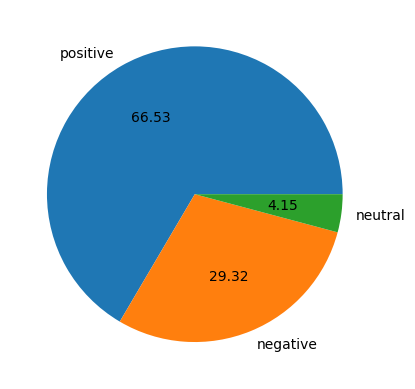

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['sentiment'].value_counts(),labels=['positive','negative','neutral'],autopct='%0.2f')
plt.show()

<Axes: >

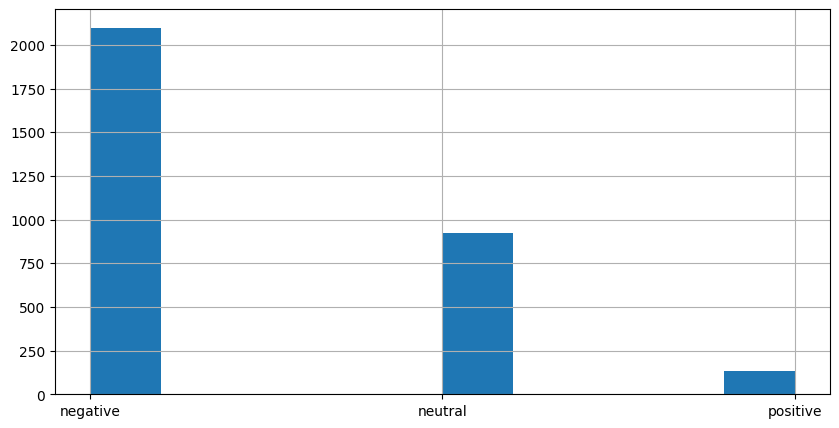

In [22]:
df['sentiment'].hist(figsize=(10,5))

In [23]:
pip install seaborn

In [24]:
import seaborn as sns

In [28]:
import string
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [29]:
from nltk.corpus import stopwords

In [30]:
from nltk.stem.porter import PorterStemmer

In [31]:
ps=PorterStemmer()

In [59]:
def transform_text(text):

  # Convert to lowercase
  text = text.lower()

  # Remove HTML tags
  soup = BeautifulSoup(text, 'html.parser')
  text = soup.get_text()

  # Tokenize the text
  text = nltk.word_tokenize(text)

  # Remove non-alphanumeric characters
  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)

  #cloning
  text = y[:]
  y.clear()


  # Remove stopwords and punctuation
  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)

  # cloning
  text  = y[:]
  y.clear()


  # Stem the words
  for i in text:
    y.append(ps.stem(i))


  # Join the processed words into a string
  return " ".join(y)


In [36]:
df['transformed_text'] = df['job_description'].apply(transform_text)

In [37]:
df.head()

,job_description,sentiment,transformed_text
0,"Sr Supply Chain Analyst Fender Los Angeles, CA...",negative,sr suppli chain analyst fender lo angel ca unk...
1,Data/Reporting Analyst US Tool Group Farmingto...,negative,analyst us tool group farmington mo unknown
2,"Senior Analyst, Returns and Analytics ABBVIE U...",neutral,senior analyst return analyt abbvi unit state ...
3,"Analyst, Customer Data Analytics Guitar Center...",negative,analyst custom data analyt guitar center westl...
4,IT Finance Business Analyst St. Luke's Univers...,negative,financ busi analyst luke univers health networ...


In [38]:
pip install wordcloud

In [42]:
from sklearn.preprocessing import LabelEncoder
lb = LabelEncoder()
df['sentiment'] = lb.fit_transform(df['sentiment'])

In [44]:
df.head()

,job_description,sentiment,transformed_text
0,"Sr Supply Chain Analyst Fender Los Angeles, CA...",0,sr suppli chain analyst fender lo angel ca unk...
1,Data/Reporting Analyst US Tool Group Farmingto...,0,analyst us tool group farmington mo unknown
2,"Senior Analyst, Returns and Analytics ABBVIE U...",1,senior analyst return analyt abbvi unit state ...
3,"Analyst, Customer Data Analytics Guitar Center...",0,analyst custom data analyt guitar center westl...
4,IT Finance Business Analyst St. Luke's Univers...,0,financ busi analyst luke univers health networ...


In [43]:
from wordcloud import WordCloud

In [40]:
wc = WordCloud(width=600,height=600,min_font_size=20,background_color='black')

In [45]:
positive_wc = wc.generate(df[df['sentiment']==2]['transformed_text'].str.cat(sep=" "))

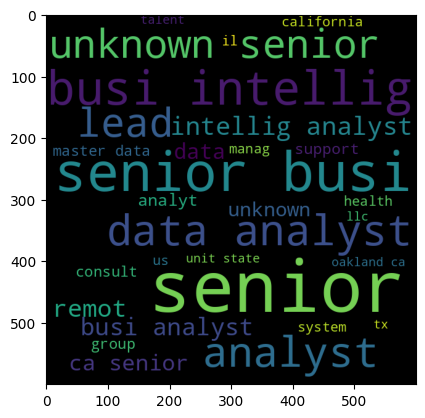

In [46]:
plt.imshow(positive_wc)

In [47]:
negative_wc = wc.generate(df[df['sentiment']==0]['transformed_text'].str.cat(sep=" "))

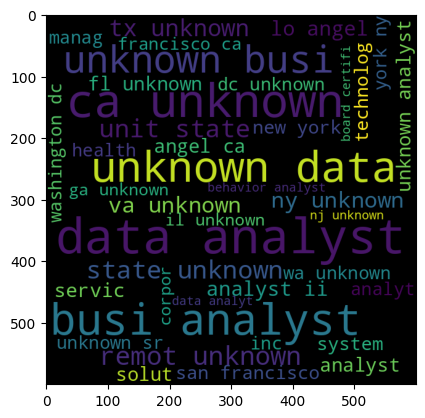

In [48]:
plt.imshow(negative_wc)

In [49]:
neutral_wc = wc.generate(df[df['sentiment']==1]['transformed_text'].str.cat(sep=" "))

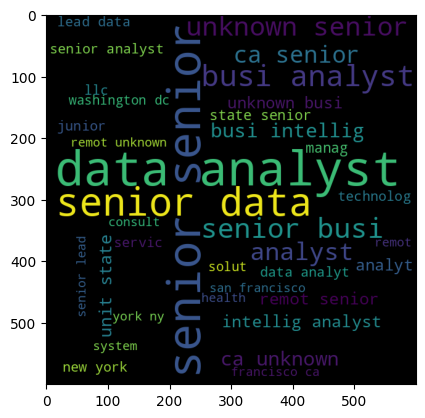

In [50]:
plt.imshow(neutral_wc)

In [51]:
# finding the top 30 words of negative and positive
from collections import Counter

In [52]:
positive_corpus=[]

for msg in df[df['sentiment']==2]['transformed_text'].tolist():
  for word in msg.split():
    positive_corpus.append(word)

len(positive_corpus)

1359

In [53]:
Counter(positive_corpus).most_common(30)

[('senior', 173),
 ('analyst', 113),
 ('busi', 70),
 ('data', 61),
 ('intellig', 47),
 ('unknown', 44),
 ('ca', 31),
 ('lead', 29),
 ('remot', 24),
 ('san', 12),
 ('analyt', 11),
 ('support', 9),
 ('master', 9),
 ('group', 8),
 ('consult', 8),
 ('dc', 7),
 ('manag', 7),
 ('system', 7),
 ('saint', 7),
 ('il', 7),
 ('us', 7),
 ('associ', 7),
 ('health', 7),
 ('california', 7),
 ('new', 6),
 ('tx', 6),
 ('unit', 6),
 ('state', 6),
 ('talent', 6),
 ('oakland', 6)]

In [55]:
negative_corpus=[]
for msg in df[df['sentiment']==0]['transformed_text'].tolist():
  for word in msg.split():
    negative_corpus.append(word)

len(negative_corpus)

18833

In [56]:
Counter(negative_corpus).most_common(30)

[('unknown', 2078),
 ('analyst', 1951),
 ('data', 1022),
 ('busi', 687),
 ('ca', 632),
 ('remot', 224),
 ('state', 205),
 ('san', 166),
 ('unit', 150),
 ('analyt', 133),
 ('tx', 124),
 ('health', 121),
 ('servic', 121),
 ('system', 121),
 ('llc', 112),
 ('va', 109),
 ('ny', 105),
 ('univers', 94),
 ('ii', 93),
 ('technolog', 92),
 ('new', 91),
 ('solut', 90),
 ('lo', 89),
 ('angel', 89),
 ('manag', 88),
 ('california', 87),
 ('consult', 86),
 ('group', 81),
 ('citi', 79),
 ('fl', 77)]

In [57]:
neutral_corpus=[]
for msg in df[df['sentiment']==1]['transformed_text'].tolist():
  for word in msg.split():
    neutral_corpus.append(word)

len(neutral_corpus)

8710

In [58]:
Counter(neutral_corpus).most_common(30)

[('senior', 1012),
 ('analyst', 845),
 ('data', 487),
 ('unknown', 396),
 ('busi', 329),
 ('ca', 223),
 ('remot', 133),
 ('lead', 99),
 ('intellig', 94),
 ('analyt', 93),
 ('state', 79),
 ('san', 74),
 ('unit', 72),
 ('health', 56),
 ('llc', 47),
 ('manag', 45),
 ('servic', 45),
 ('new', 44),
 ('washington', 43),
 ('tx', 41),
 ('junior', 39),
 ('citi', 39),
 ('va', 38),
 ('york', 38),
 ('dc', 37),
 ('technolog', 37),
 ('ny', 37),
 ('system', 35),
 ('corpor', 34),
 ('solut', 34)]